https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [3]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from time import time

from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras.utils as np_utils
from sktime_dl.deeplearning import ResNetClassifier

from sklearn.metrics import classification_report
import pickle

figure_path = module_path + '/figures/small_segment_dataset_plots/'

In [4]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

start = time()
network = ResNetClassifier(nb_epochs=20, verbose=True)
network.fit(X_train, y_train)
y_pred = network.predict(X_test)

print(f'Time utilized = {time() - start}')

['crackle' 'normal' 'wheeze'] [438 418 431]
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4000, 64)     576         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4000, 64)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 4000, 64)     0           batch_normalization[0][0]        
__________________________________________________

81/81 [==============================] - 123s 1s/step - loss: 1.1417 - accuracy: 0.4017
Epoch 2/20
81/81 [==============================] - 120s 1s/step - loss: 1.0758 - accuracy: 0.4274
Epoch 3/20
81/81 [==============================] - 127s 2s/step - loss: 1.0473 - accuracy: 0.4553
Epoch 4/20
81/81 [==============================] - 132s 2s/step - loss: 1.0442 - accuracy: 0.4479
Epoch 5/20
81/81 [==============================] - 133s 2s/step - loss: 1.0233 - accuracy: 0.4541
Epoch 6/20
81/81 [==============================] - 133s 2s/step - loss: 1.0199 - accuracy: 0.4665
Epoch 7/20
81/81 [==============================] - 134s 2s/step - loss: 1.0125 - accuracy: 0.4970
Epoch 8/20
81/81 [==============================] - 127s 2s/step - loss: 0.9880 - accuracy: 0.5050
Epoch 9/20
81/81 [==============================] - 127s 2s/step - loss: 0.9903 - accuracy: 0.4856
Epoch 10/20
81/81 [==============================] - 132s 2s/step - loss: 0.9797 - accuracy: 0.5146
Epoch 11/20
81/81 [=

              precision    recall  f1-score   support

     crackle       0.32      1.00      0.49       111
      normal       0.00      0.00      0.00       105
      wheeze       0.00      0.00      0.00       128

    accuracy                           0.32       344
   macro avg       0.11      0.33      0.16       344
weighted avg       0.10      0.32      0.16       344



/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


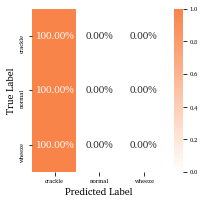

In [5]:
figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 3)

f.savefig(figure_path + f'cm_simpleResNet_3class.pdf', bbox_inches='tight')

print(classification_report(y_test, y_pred))

# 2 class

In [6]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

start = time()
network = ResNetClassifier(nb_epochs=20, verbose=True)
network.fit(X_train, y_train)
y_pred = network.predict(X_test)

print(f'Time utilized = {time() - start}')

['crackle' 'wheeze'] [426 441]
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 4000, 64)     576         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 4000, 64)     256         conv1d_11[0][0]                  
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 4000, 64)     0           batch_normalization_12[0][0]     
_____________________________________________________________

55/55 [==============================] - 90s 2s/step - loss: 0.7255 - accuracy: 0.5742
Epoch 2/20
55/55 [==============================] - 93s 2s/step - loss: 0.6437 - accuracy: 0.6396
Epoch 3/20
55/55 [==============================] - 97s 2s/step - loss: 0.6430 - accuracy: 0.6347
Epoch 4/20
55/55 [==============================] - 94s 2s/step - loss: 0.6056 - accuracy: 0.6501
Epoch 5/20
55/55 [==============================] - 97s 2s/step - loss: 0.5989 - accuracy: 0.6840
Epoch 6/20
55/55 [==============================] - 94s 2s/step - loss: 0.5988 - accuracy: 0.6618
Epoch 7/20
55/55 [==============================] - 95s 2s/step - loss: 0.5650 - accuracy: 0.7091
Epoch 8/20
55/55 [==============================] - 96s 2s/step - loss: 0.5761 - accuracy: 0.6801
Epoch 9/20
55/55 [==============================] - 96s 2s/step - loss: 0.5981 - accuracy: 0.6691
Epoch 10/20
55/55 [==============================] - 101s 2s/step - loss: 0.5561 - accuracy: 0.6894
Epoch 11/20
55/55 [==========

              precision    recall  f1-score   support

     crackle       0.52      1.00      0.68       123
      wheeze       0.00      0.00      0.00       114

    accuracy                           0.52       237
   macro avg       0.26      0.50      0.34       237
weighted avg       0.27      0.52      0.35       237



/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


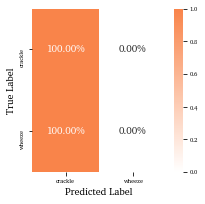

In [7]:
figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 3)

f.savefig(figure_path + f'cm_simpleResNet_2class.pdf', bbox_inches='tight')


print(classification_report(y_test, y_pred))